In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb

In [2]:
import warnings
warnings.filterwarnings("ignore")

import helpers




In [3]:
class Distances(object):
    
    def __init__(self,P,Q):
        if sum(P)<1e-20 or sum(Q)<1e-20:
            raise "One or both vector are zero (empty)..."
        if len(P)!=len(Q):
            raise "Arrays need to be of equal sizes..."
        #use numpy arrays for efficient coding
        P=np.array(P,dtype=float);Q=np.array(Q,dtype=float)
        #Correct for zero values
        P[np.where(P<1e-20)]=1e-20
        Q[np.where(Q<1e-20)]=1e-20
        self.P=P
        self.Q=Q
        
    def sqEuclidean(self):
        P=self.P; Q=self.Q; d=len(P)
        return sum((P-Q)**2)
    
    def probsymm(self):
        P=self.P; Q=self.Q; d=len(P)
        return 2*sum((P-Q)**2/(P+Q))
    
    def topsoe(self):
        P=self.P; Q=self.Q
        return sum(P*np.log(2*P/(P+Q))+Q*np.log(2*Q/(P+Q)))
    def hellinger(self):
        P=self.P; Q=self.Q
        return 2 * np.sqrt(1 - sum(np.sqrt(P * Q)))


def DyS_distance(sc_1, sc_2, measure):
    
    dist = Distances(sc_1, sc_2)
    
    if measure == 'sqEuclidean':
        return dist.sqEuclidean()
    if measure == 'topsoe':
        return dist.topsoe()
    if measure == 'probsymm':
        return dist.probsymm()
    if measure == 'hellinger':
        return dist.hellinger()
    return 100


def TernarySearch(left, right, f, eps=1e-4):

    while True:
        if abs(left - right) < eps:
            return(left + right) / 2
    
        leftThird  = left + (right - left) / 3
        rightThird = right - (right - left) / 3
    
        if f(leftThird) > f(rightThird):
            left = leftThird
        else:
            right = rightThird 


def getHist(scores, nbins):
    breaks = np.linspace(0, 1, int(nbins)+1)
    breaks = np.delete(breaks, -1)
    breaks = np.append(breaks,1.1)
    
    re = np.repeat(1/(len(breaks)-1), (len(breaks)-1))  
    for i in range(1,len(breaks)):
        re[i-1] = (re[i-1] + len(np.where((scores >= breaks[i-1]) & (scores < breaks[i]))[0]) ) / (len(scores)+1)
    return re

def DyS(pos_scores, neg_scores, test_scores, measure='topose'):
    
    bin_size = np.linspace(2,20,10)  #[10,20] range(10,111,10) #creating bins from 2 to 10 with step size 2
    bin_size = np.append(bin_size, 30)
    
    result  = []
    for bins in bin_size:
        #....Creating Histograms bins score\counts for validation and test set...............
        
        p_bin_count = getHist(pos_scores, bins)
        n_bin_count = getHist(neg_scores, bins)
        te_bin_count = getHist(test_scores, bins)
        
        def f(x):            
            return(DyS_distance(((p_bin_count*x) + (n_bin_count*(1-x))), te_bin_count, measure = measure))
    
        result.append(TernarySearch(0, 1, f))                                           
    
    print(result)
    pos_prop = np.median(result)
    return pos_prop

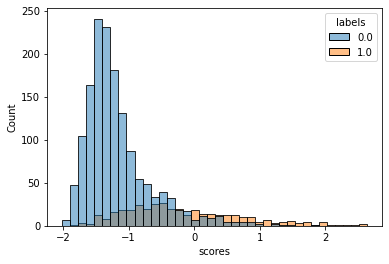

In [4]:
tr_scores = np.load("scores/SkillCraft/Row1/Class1/train_scores.npy")
te_scores = np.load("scores/SkillCraft/Row1/Class1/test_scores.npy")
tr_y = np.load("scores/SkillCraft/Row1/Class1/y_train1.npy")
te_y = np.load("scores/SkillCraft/Row1/Class1/y_test1.npy")

tr = pd.DataFrame(np.transpose(np.array([tr_scores, tr_y])), columns = ['scores','labels'])
te = pd.DataFrame(np.transpose(np.array([te_scores, te_y])), columns = ['scores','labels'])

ax = sns.histplot(data=tr, x='scores', hue='labels')

In [5]:
pos_scores = tr[tr.labels == 1].scores
neg_scores = tr[tr.labels == 0].scores

p_pos = len(pos_scores) / (len(pos_scores)+len(neg_scores))
p_neg = len(neg_scores) / (len(pos_scores)+len(neg_scores))

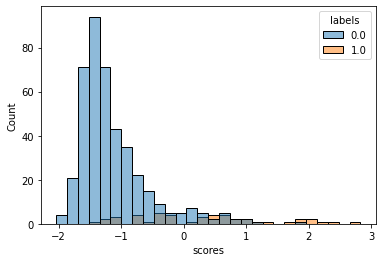

In [6]:
ax = sns.histplot(data=te, x='scores', hue='labels')

In [7]:
pos_te_scores = te[te.labels == 1].scores
neg_te_scores = te[te.labels == 0].scores

p_pos_te = len(pos_te_scores) / (len(pos_te_scores)+len(neg_te_scores))
p_neg_te = len(neg_te_scores) / (len(pos_te_scores)+len(neg_te_scores))

print("Target pos dist: ", p_pos_te)

Target pos dist:  0.09871244635193133


In [8]:
DyS(pos_scores, neg_scores, te.scores, measure='sqEuclidean')

[0.24148870296569813, 0.24247855796274725, 0.23898617943786038, 0.2324964865295434, 0.22114281989837747, 0.2084130263335962, 0.21167594466530543, 0.23191212793144367, 0.2202555137223931, 0.21043631998453638, 0.17765609405153515]


0.22114281989837747

# Class 2

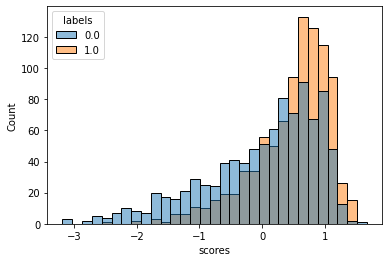

In [9]:
tr_scores = np.load("scores/SkillCraft/Row1/Class2/train_scores.npy")
te_scores = np.load("scores/SkillCraft/Row1/Class2/test_scores.npy")
tr_y = np.load("scores/SkillCraft/Row1/Class2/y_train2.npy")
te_y = np.load("scores/SkillCraft/Row1/Class2/y_test2.npy")

tr = pd.DataFrame(np.transpose(np.array([tr_scores, tr_y])), columns = ['scores','labels'])
te = pd.DataFrame(np.transpose(np.array([te_scores, te_y])), columns = ['scores','labels'])

ax = sns.histplot(data=tr, x='scores', hue='labels')

In [10]:
pos_scores = tr[tr.labels == 1].scores
neg_scores = tr[tr.labels == 0].scores

p_pos = len(pos_scores) / (len(pos_scores)+len(neg_scores))
p_neg = len(neg_scores) / (len(pos_scores)+len(neg_scores))

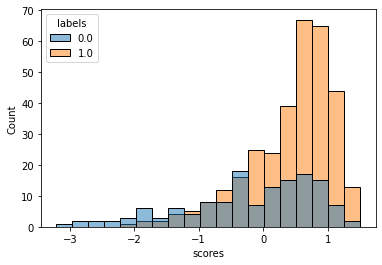

In [11]:
ax = sns.histplot(data=te, x='scores', hue='labels')

In [12]:
pos_te_scores = te[te.labels == 1].scores
neg_te_scores = te[te.labels == 0].scores

p_pos_te = len(pos_te_scores) / (len(pos_te_scores)+len(neg_te_scores))
p_neg_te = len(neg_te_scores) / (len(pos_te_scores)+len(neg_te_scores))

print("Target pos dist: ", p_pos_te)

Target pos dist:  0.7017167381974249


In [13]:
DyS(pos_scores, neg_scores, te.scores, measure='sqEuclidean')

[0.46577124499458883, 0.4675932377734306, 0.4278002217878094, 0.4444237053316981, 0.41543779869458985, 0.4786428445209528, 0.42611145110913756, 0.4129429326094792, 0.36949645974800666, 0.3779186723169815, 0.3448158675165744]


0.42611145110913756

# Class 3

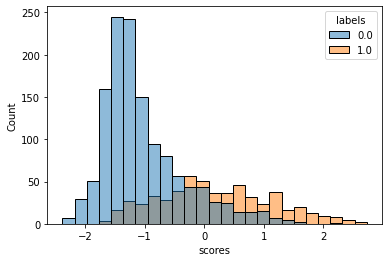

In [14]:
tr_scores = np.load("scores/SkillCraft/Row1/Class3/train_scores.npy")
te_scores = np.load("scores/SkillCraft/Row1/Class3/test_scores.npy")
tr_y = np.load("scores/SkillCraft/Row1/Class3/y_train3.npy")
te_y = np.load("scores/SkillCraft/Row1/Class3/y_test3.npy")

tr = pd.DataFrame(np.transpose(np.array([tr_scores, tr_y])), columns = ['scores','labels'])
te = pd.DataFrame(np.transpose(np.array([te_scores, te_y])), columns = ['scores','labels'])

ax = sns.histplot(data=tr, x='scores', hue='labels')

In [15]:
pos_scores = tr[tr.labels == 1].scores
neg_scores = tr[tr.labels == 0].scores

p_pos = len(pos_scores) / (len(pos_scores)+len(neg_scores))
p_neg = len(neg_scores) / (len(pos_scores)+len(neg_scores))

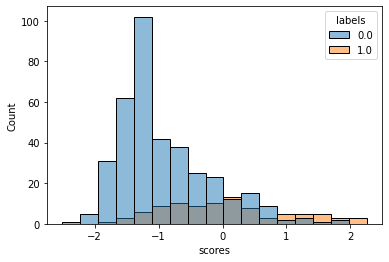

In [16]:
ax = sns.histplot(data=te, x='scores', hue='labels')

In [17]:
pos_te_scores = te[te.labels == 1].scores
neg_te_scores = te[te.labels == 0].scores

p_pos_te = len(pos_te_scores) / (len(pos_te_scores)+len(neg_te_scores))
p_neg_te = len(neg_te_scores) / (len(pos_te_scores)+len(neg_te_scores))

print("Target pos dist: ", p_pos_te)

Target pos dist:  0.19957081545064378


In [18]:
DyS(pos_scores, neg_scores, te.scores, measure='sqEuclidean')

[0.2173151372931174, 0.22336427635019657, 0.2210077704539205, 0.23159556228780032, 0.21240770903589878, 0.2362628817205491, 0.24007001214110385, 0.24004773594408002, 0.21350287290527975, 0.20068170940688057, 0.18777060443735727]


0.2210077704539205

## DyS Schumacher

In [19]:
"""This function fit a quantifier using the codes provided by Tobias Schumacher.
 
Parameters
----------
qntMethod : string
    Quantification method name, according to the alg_index.csv file
X_train : DataFrame
    A DataFrame of the training data.
y_train : DataFrame
    A DataFrame with the training labels.
Returns
-------
object
    the quantifier fitted. 
 """
def fit_quantifier_schumacher_github(qntMethod, X_train, y_train):
    
    algorithm_index = pd.read_csv("./alg_index.csv",
                                sep=";",
                                index_col="algorithm")


    algorithm_index = algorithm_index.loc[algorithm_index.export == 1]
    algorithms = list(algorithm_index.index)

    algorithm_dict = dict({alg: helpers.load_class(algorithm_index.loc[alg, "module_name"],
                                                algorithm_index.loc[alg, "class_name"])
                        for alg in algorithms})

    init_args = []

    fit_args = [np.asarray(X_train), np.asarray(y_train)]   
    qf = algorithm_dict[qntMethod](*init_args)
    qf.fit(*fit_args)
    return qf   


"""This function predict the class distribution from a given test set.
 
Parameters
----------
qnt : object
    A quantifier previously fitted from some training data.
X_train : DataFrame
    A DataFrame of the test data.
Returns
-------
array
    the class distribution of the test calculated according to the qntMethod quantifier. 
 """
def predict_quantifier_schumacher_github(qnt, X_test):
    return qnt.predict(*[np.asarray(X_test)])


In [20]:
X_train = np.load("scores/SkillCraft/Row1/Class1/X_train.npy")
y_train = np.load("scores/SkillCraft/Row1/Class1/y_train.npy")

qnt1 = fit_quantifier_schumacher_github('DyS', X_train, y_train)


In [21]:
X_test = np.load("scores/SkillCraft/Row1/Class1/X_test.npy")
pred_dist = predict_quantifier_schumacher_github(qnt1, X_test) 

Predict _ovr_0
Para
> /Users/andregustavom/projects/multiclassQuantification/QFY/distribution_matching/_base.py(132)predict()
    130         print('Para')
    131         pdb.set_trace()
--> 132         if self._solve_cvx is None:
    133             return self.gs_search(yp)
    134         else:

array([0.17811159, 0.45064378, 0.17381974, 0.07081545, 0.04291845,
       0.04291845, 0.0193133 , 0.00214592, 0.01287554, 0.00643777])


BdbQuit: 

In [ ]:
from QFY.distribution_matching._ovr_multiclass import BinaryDyS
from sklearn import svm

In [ ]:
qf=BinaryDyS(clf=svm.SVC(), distance='TS', nbins=10, nfolds=10, solve_cvx=True)

In [ ]:
X_train.shape

(1872, 18)

In [ ]:
#X_train_b = np.load("scores/SkillCraft/Row1/Class1/X_train.npy")
#y_train = np.load("scores/SkillCraft/Row1/Class1/y_train.npy")

#qnt1 = fit_quantifier_schumacher_github('DyS', X_train, y_train)
#X_test = np.load("scores/SkillCraft/Row1/Class1/X_test.npy")
#pred_dist = predict_quantifier_schumacher_github(qnt1, X_test) 
